<b>Tasks:</b>
- to clean the data using the dataset with information about Titanic passengers 
- achieve a high value of metric


часть идей брал отсюда https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1. Load data
df = pd.read_csv('dz_materials/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#function for metrics
def to_determine_metrics(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1-measure: ', f1_score(y_test, y_pred))
    

### Step 2. Deleting empties and categories

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Cabin', 'Age', 'Name', 'Sex', 'Ticket', 'Embarked', 'Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
to_determine_metrics(y_test, lr.predict(X_test))

Accuracy:  0.6891025641025641
Precision:  0.6736111111111112
Recall:  0.3975409836065574
F1-measure:  0.5


### Step 3-4. Delete excess data + Step 8 Graphics
Survival - целевая переменная. (the target variable)

- Pclass - например, может влиять на приоритет спасения. (can influences, for instance, the priority of rescuing)
- Sex, Age - физ. характристика человека. (influences the physical capabilities of people)
- Sibsp, Parch - родственники могли кооперироваться для спасения. (family can help)
- Fare - стоимость билета, признак похож на Pclass. (that field might has a high correlation with [Pclass])
- Embarked - куда человек плыл аналогично маловероятно играет важную роль.


<b>Drop:</b>
- Name, PassengerId - имя человека маловероятно играет важную роль.
- Ticket - много категорий, сложный для преобразования признак.
- Cabin - мало данных, хотя расположение комнат и могло сыграть решающую роль в выживании. (lack of data)

In [7]:
df = df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'])

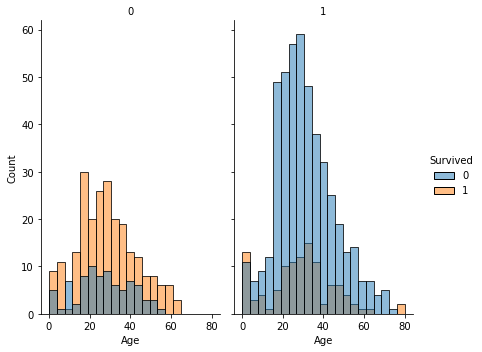

In [30]:
import seaborn as sns

g = sns.displot(
    data=df, x="Age", hue="Survived", col="Sex",
    kind="hist", height=5, aspect=.6,
)
g.set_axis_labels("Age")
g.set_titles("{col_name}")

<b> Возраст и пол однозначно влияют на целевую переменную. </b>

Больше шансов на спасение:
    1) у детей обоих полов
    2) у муж возраста от 20 до 30
    3) у жен возраста от 18 до 40

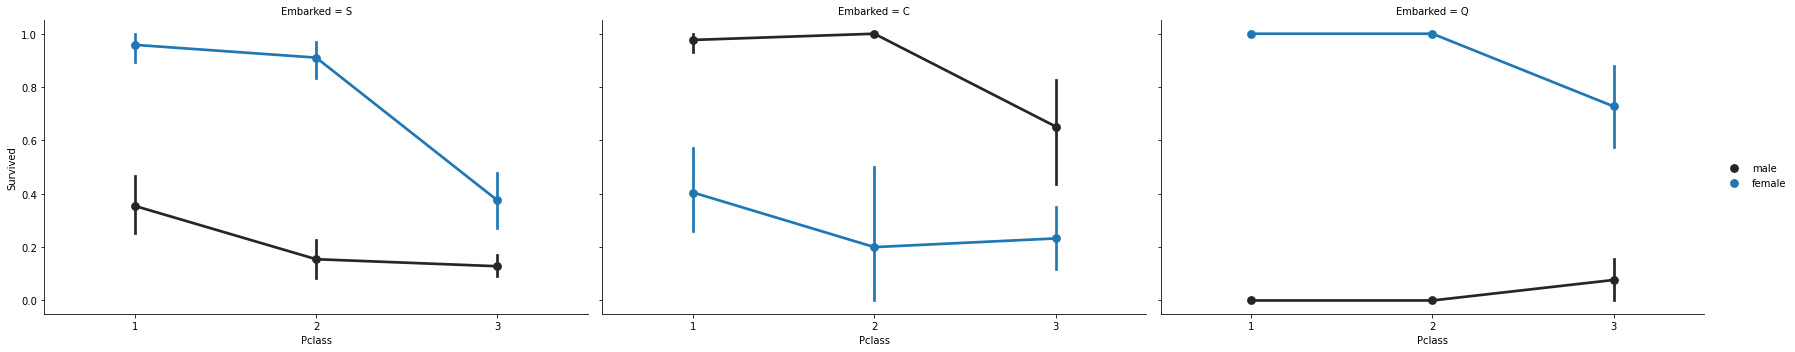

In [9]:
import seaborn as sns
FacetGrid = sns.FacetGrid(data=df, col="Embarked", height=5, aspect=1.6)
FacetGrid.map_dataframe(sns.pointplot, x='Pclass', y='Survived', hue='Sex', order=None )
FacetGrid.add_legend()

<b>Сыграл роль и порт, откуда отправлялись пассажиры. Порт С имеет обратную зависимость: мужчины тут имели большую веротяность выжить, относительно других портов отправления. </b>

<b>Чем выше класс пассажира , тем вероятнее что он выжил</b>

<AxesSubplot:xlabel='Sibsp and Parch', ylabel='Survived'>

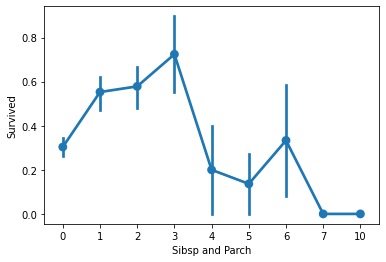

In [10]:
df['Sibsp and Parch'] = df['SibSp'] + df['Parch']
sns.pointplot(data=df, y='Survived', x='Sibsp and Parch')

<b>Больше всего шансов выжить было у тех, кто имел 1-3 родственника</b>

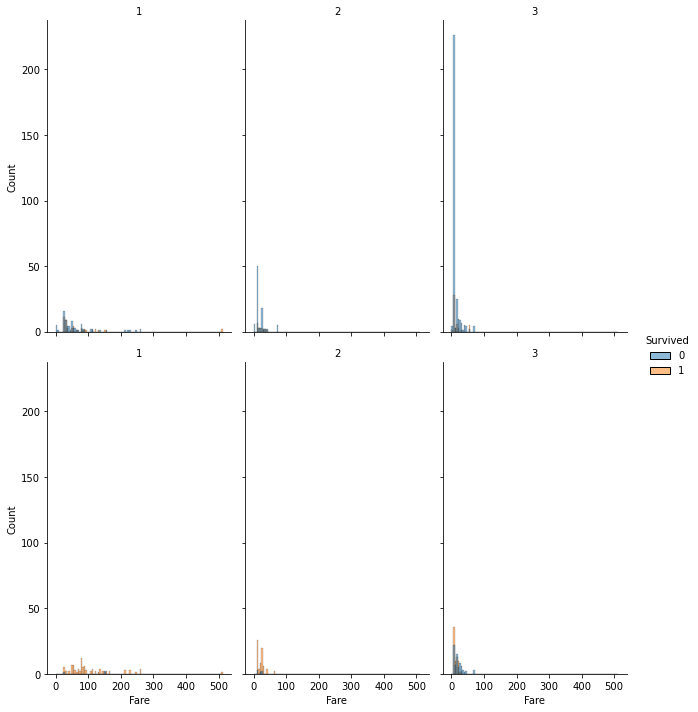

In [11]:
g = sns.displot(
    data=df, x="Fare", hue="Survived", col="Pclass", row='Sex',
    kind="hist", height=5, aspect=.6,
)
g.set_axis_labels("Fare")
g.set_titles("{col_name}")

<b>Из полученных графиков сложно сделать конкретный вывод, но данное поле стоит оставить для дальнейшего анализа</b>

### Step 5. Parsing and Replacing Nulls

In [19]:
print('Precent of losing data [Age]: ',  1 - len(df[~(df.Age.isna())])/len(df))
print('Precent of losing data [Embarked]: ', 1 - len(df[~(df.Embarked.isna())])/len(df))

# Empty Age -> mean Age +- std
df.Age.loc[df.Age.isna()] = np.absolute(np.random.normal(loc=df.Age.mean(), scale=df.Age.std(), size=len(df[df.Age.isna()])))

# Embarked -> changing empties to most popular value 'S'
df.Embarked.loc[df.Embarked.isna()] = 'S'

Precent of losing data [Age]:  0.19865319865319864
Precent of losing data [Embarked]:  0.002244668911335568


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Step 6. Encode categories

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode [Sex]
le = LabelEncoder().fit(df.Sex)
df.Sex = le.transform(df.Sex)

# Encode [Embarked]
le = LabelEncoder().fit(df.Embarked)
df.Embarked = le.transform(df.Embarked)

### Step 7. Check emissions

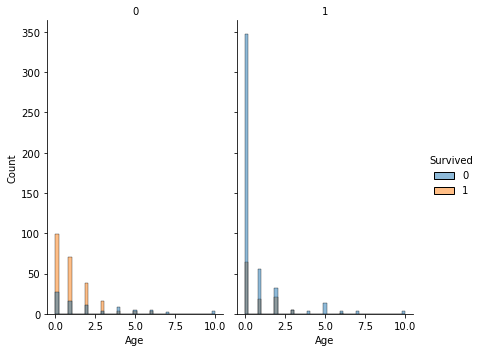

In [21]:
g = sns.displot(
    data=df, x="Sibsp and Parch", hue="Survived", col="Sex",
    kind="hist", height=5, aspect=.6,
)
g.set_axis_labels("Age")
g.set_titles("{col_name}")

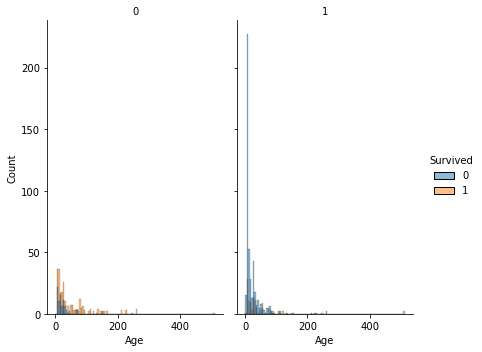

In [22]:
g = sns.displot(
    data=df, x="Fare", hue="Survived", col="Sex",
    kind="hist", height=5, aspect=.6,
)
g.set_axis_labels("Age")
g.set_titles("{col_name}")

<b>Выбросы, которые стоило бы удалить, мною не оноружены.</b>

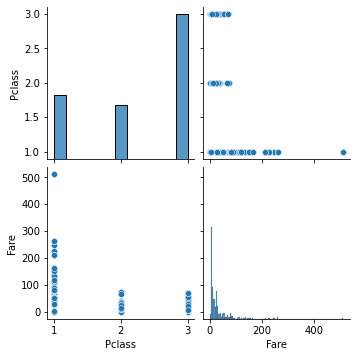

In [23]:
sns.pairplot(df[['Pclass','Fare']]);

## Case 9. Transforming [Age]

In [36]:
def transform_age(line):
    if line <= 13:
        return 1
    elif line > 13 and line <=18:
        return 2
    elif line > 18 and line <= 24:
        return 3
    elif line > 24 and line <= 30:
        return 4
    elif line > 30 and line <= 35:
        return 5
    elif line > 35 and line <= 40:
        return 6
    elif line > 40 and line <= 45:
        return 7
    elif line > 45  and line <= 55:
        return 8
    elif line > 55  and line <= 65:
        return 9
    else:
        return 10
    
df['Age_Category'] = df.Age.apply(transform_age)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sibsp and Parch,Age_Category
0,0,3,1,22.0,1,0,7.2500,2,1,3
1,1,1,0,38.0,1,0,71.2833,0,1,6
2,1,3,0,26.0,0,0,7.9250,2,0,4
3,1,1,0,35.0,1,0,53.1000,2,1,5
4,0,3,1,35.0,0,0,8.0500,2,0,5


## Case 10. Fit again

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df['Survived']
X = df.drop(columns=['Survived', 'Age', 'Sibsp and Parch'])


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
to_determine_metrics(y_test, lr.predict(X_test))

Accuracy:  0.7916666666666666
Precision:  0.7544642857142857
Recall:  0.6926229508196722
F1-measure:  0.7222222222222222


<b>Выводы:</b>
1) метрика F1 улучшилась на 23%, что говорит о целесообразности преобразования исходных данных. 

2) в ходе работы были сделаны следующие преобразования: 
- заполнение пропусков [Age] с помощью нормального распределения, а также преобразован в категорию.
- удаление столбцов ['Name', 'Ticket', 'PassengerId', 'Cabin'] т.к. ['Name', 'PassengerId'] не содержат полезной информации, 'Ticket' содержит много категорий, что затрудняет его обработку, в 'Cabin' значения пропущены более чем на 50%
- был преобразован 

3) В ходе работы были построены графики отражающие зависимости и связи каждого признака и целевой переменной.